In [1]:
c64_to_rgb = {
"black": "#000000",     
"white": "#ffffff",     
"red": "#880000",       
"cyan":  "#aaffee",     
"violet": "#cc44cc",    
"purple": "#cc44cc",    
"green": "#00cc55",     
"blue":  "#0000aa",     
"yellow":  "#eeee77",   
"orange":  "#dd8855",   
"brown": "#664400",     
"lightred": "#ff7777",  
"darkgrey": "#333333",  
"grey":  "#333333",    
"grey2":  "#777777",    
"darkgray": "#333333",  
"gray":  "#333333",    
"gray2":  "#777777",    
"lightgreen": "#aaff66",
"lightblue":  "#0088ff",
"lightgrey": "#bbbbbb", 
"lightgray": "#bbbbbb", 
"grey3": "#bbbbbb",                             
"gray3": "#bbbbbb",                             
}
colors = list(c64_to_rgb.values())


In [147]:

ia_mapping = [
    (0x0000, "System ROM", "black"),
    (0x0800, "Title Screen Logic", "blue"),
    (0x0d55, "DNA", "red"),
    (0x149c, "Title Music Logic", "blue"),
    #(0x16cf, "Nothing"),
    (0x18c8, "Level Data", "green"),
    (0x2000, "Current Planet Character Set", "orange"),
    (0x2800, "Main Sprites", "gray"),
    #(0x4000, "Main Control Loop", "blue"),
    (0x4000, "", "blue"),
    (0x40d3, "Made in France", "red"),
    (0x4788, "Main Game Logic", "blue"),
    (0x7f08, "Planet Surface Memory", "green"),
    (0x9000, "Planet Character Sets", "orange"),
    (0x9b00, "Level Data", "green"),
    (0xaac0, "Bonus Phase Game Logic", "blue"),
    (0xc800, "Hi Score Table Logic", "darkblue"),
    #(0xcecc, "Nothing", "black"),
    (0xcecc, "", "black"),
    (0xd000, "System ROM", "black"),
    (0xe000, "Bonus Phase Graphics", "orange"),
    (0xe830, "Enemy Sprites", "gray"),
    (0xffff, "End", "black"),
]

y_ticks = [
    (0x0000, "System ROM", "black"),
    (0x0800, "Title Screen Logic", "blue"),
    (0x0d55, "DNA", "red"),
    (0x149c, "Title Music Logic", "blue"),
    #(0x16cf, "Nothing"),
    (0x18c8, "Level Data", "green"),
    (0x2000, "Current Planet Character Set", "orange"),
    (0x2800, "Main Sprites", "gray"),
    #(0x4000, "Main Control Loop", "blue"),
    #(0x4000, "", "blue"),
    (0x40d3, "Made in France", "red"),
    (0x4788, "Main Game Logic", "blue"),
    (0x7f08, "Planet Surface Memory", "green"),
    (0x9000, "Planet Character Sets", "orange"),
    (0x9b00, "Level Data", "green"),
    (0xaac0, "Bonus Phase Game Logic", "blue"),
    (0xc800, "Hi Score Table Logic", "darkblue"),
    #(0xcecc, "Nothing", "black"),
    #(0xcecc, "", "black"),
    (0xd000, "System ROM", "black"),
    (0xe000, "Bonus Phase Graphics", "orange"),
    (0xe830, "Enemy Sprites", "gray"),
    (0xffff, "End", "black"),
]


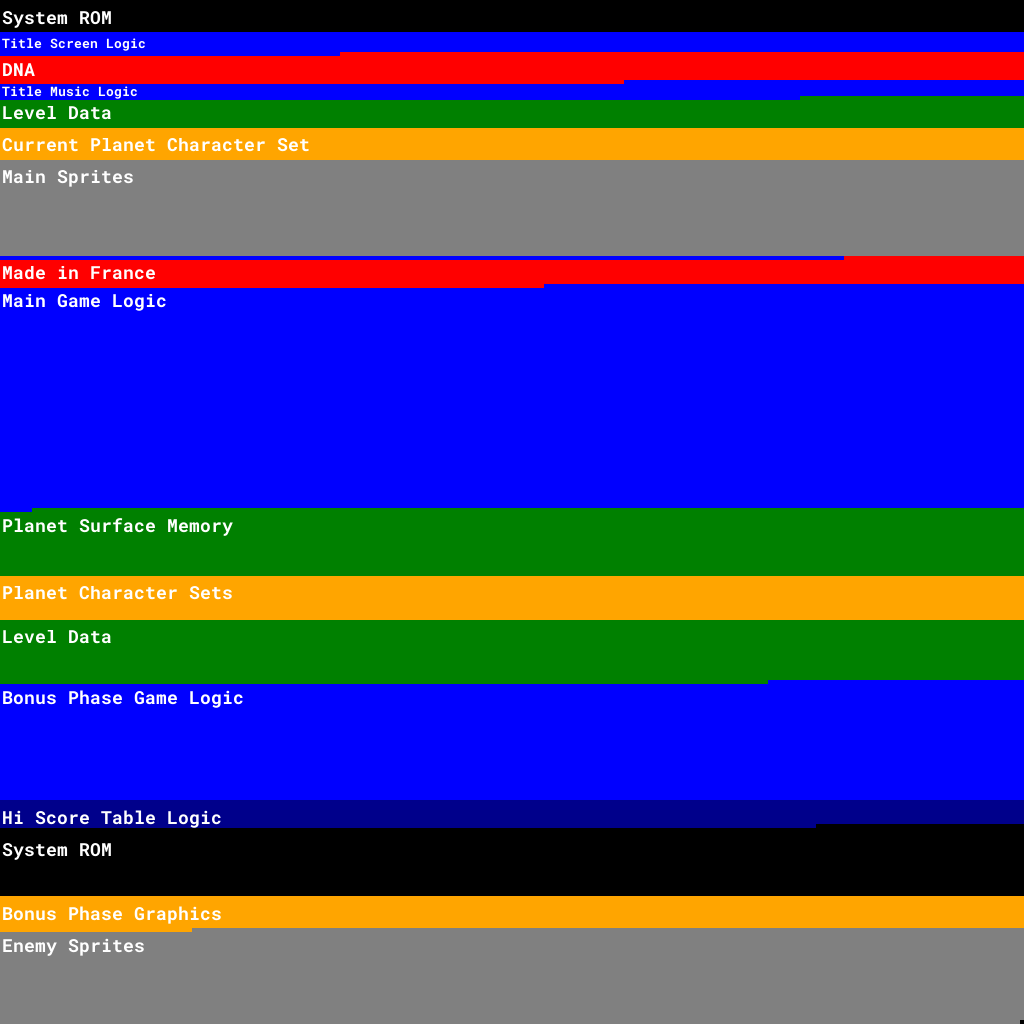

In [145]:
from PIL import Image, ImageColor, ImageFont, ImageDraw

# PIL accesses images in Cartesian co-ordinates, so it is Image[columns, rows]
img = Image.new( 'RGB', (0x100,0x100), "black") # create a new black image
pixels = img.load() # create the pixel map

def getDesc(pos):
    for i, (p,n,color) in enumerate(ia_mapping):
        if pos < p:
            return (p, ImageColor.getrgb(pcolor), pn)
        pcolor, pn = color, n
    return (p, ImageColor.getrgb(pcolor), pn)

curr_upper, curr_color,curr_name = 0,0,0
texts = []
for j in range(img.size[1]):    # For every row
    for i in range(img.size[0]):    # for every col:
        pos = i + (0x100 * j)
        if pos < curr_upper:
            pixels[i,j] =  curr_color
            continue
        curr_upper, curr_color,curr_name = getDesc(pos)
        pixels[i,j] =  curr_color
        texts += [(j,curr_name)]

img = img.resize((img.width * 4, img.height * 4), Image.NEAREST)

draw = ImageDraw.Draw(img)
font = ImageFont.truetype("../src/fonts/RobotoMono-Bold.ttf", 18)
small_texts = ["Title Screen Logic", "Title Music Logic"]
for (j,text) in texts:
    font = ImageFont.truetype("../src/fonts/RobotoMono-Bold.ttf", 18)
    offset = 5
    if text in small_texts:
        font = ImageFont.truetype("../src/fonts/RobotoMono-Bold.ttf", 13)
        offset = 2
    draw.text((2, (j*4) + offset),text,(255,255,255),font=font)
img


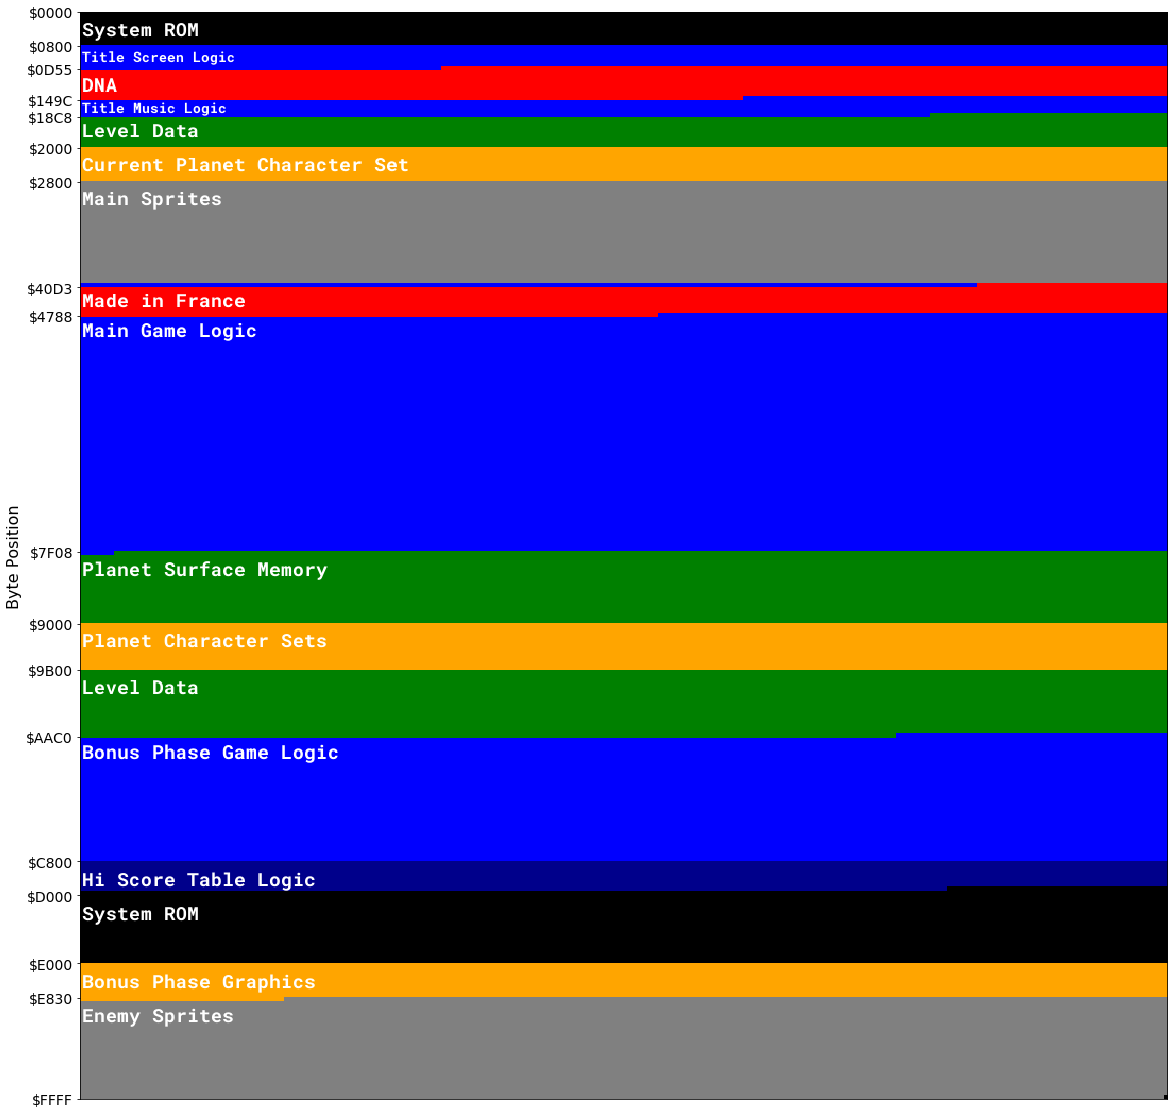

In [152]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

#1 pixel = 100 meters
r = 1./100.

fig, ax = plt.subplots(figsize=(20,20))
#ax.imshow(image, extent=(0,image.shape[1]/r,0,image.shape[0]/r) )
ax.imshow(img, extent=(0,0xffff,0xffff,0))
ax.set_ylabel("Byte Position", fontsize = 16)  
#x_label_list = ['A2', 'B2', 'C2', 'D2']
#ax.set_xticklabels(x_label_list)
ax.set_yticks([int(i) for i,n,c in y_ticks])
ax.set_xticks([])

axes = plt.gca()
axes.get_yaxis().set_major_formatter(ticker.FormatStrFormatter("$%04X"))
plt.yticks(fontsize=14)

#plt.show()
plt.savefig("../src/archaeo/layout.png", bbox_inches="tight")
#image